# 개요

**연결 리스트**(**Linked List**)  
컴퓨터과학에서 배열과 함께 가장 기본이 되는 대표적인 선형 자료구조 중 하나  
다양한 **추상 자료형**(**Abstract Data Type**) 구현의 기반이 된다  
- 동적으로 새로운 노드를 삽입하거나 삭제하기가 간편
- 쉬운 관리(연결 구조를 통해 물리 메모리를 연속적으로 사용하지 않아도 되기 때문)

데이터를 구조체로 묶어서 포인터로 연결한다는 개념은 여러 가지 방법으로 다양하게 활용이 가능하다  
실제로 컴퓨터의 물리 메모리에는 구조체 각각이 서로 연결된 형태로 구성되어 있고,  
메모리 어딘가에 흩뿌려진 형상을 띈다

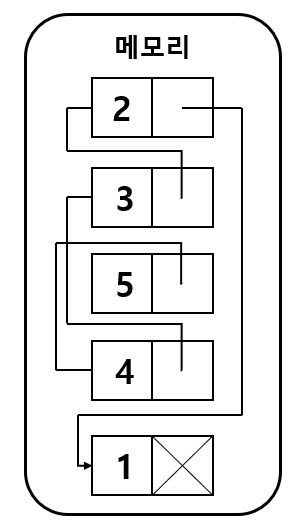

연결 리스트는 배열과는 달리 특정 인덱스에 접근하기 위해서는 전체를 순서대로 읽어야 하므로  
상수 시간에 접근할 수 없다.  즉 탐색에는 O(n)이 소요된다  
반면, 시작 또는 끝 지점에 아이템을 추가하거나 삭제, 추출하는 작업은 O(1)에 가능하다

# 예제 풀이

## Q13. 팰린드롬 연결 리스트  
- 연결 리스트가 팰린드롬 구조인지 판별하라  


**예제 1**
___
- 입력  
```
1 -> 2
```
___
- 출력  
```
false
```
___
**예제 2**
___
- 입력
```  
1 -> 2 -> 2 -> 1
```
___
- 출력
```  
true
```
___

### 풀이 01 // 리스트 변환



**리스트 변환을 사용하는 이유**  
___
팰린드롬 여부를 판별하기 위해서는 앞뒤로 모두 추출할 수 있는 자료구조가 필요하다    
일반적인 스택 자료구조는 마지막 요소만 추출하는 연산만 존재한다  
하지만 파이썬의 리스트는 pop() 함수에 인덱스를 지정할 수 있어 마지막 요소가 아니더라도  
얼마든지 원하는 위치를 자유롭게 추출할 수 있다  
따라서 연결 리스트를 파이썬의 리스트로 변환하여 리스트의 기능을 이용하면 쉽게 풀이가 가능할것이다  
___


In [ ]:
# 연결 리스트 입력값을 파이썬 리스트로 변환
class ListNode:  # ListNode 정의
    def __init__(self, x):
        self.val = x
        self.next = None



class Solution: 
    def pylist(self, head: ListNode) -> bool:
        q: List = []

        if not head:
            return True
        
        node = head
        # 리스트 변환
        while node is not None: # node값이 없을때까지
            q.append(node.val) # append로 리스트 변환 
            node = node.next # 노드 값을 다음 노드값으로 변환

        # 팰린드롬 판별
        while len(q) > 1: # q 리스트의 길이가 1 이상일때
            if q.pop(0) != q.pop(): # q 리스트의 첫번째 값과 마지막 값이 다르다면
                return False # False를 반환
 
        return True # 아니면 True 반환

if __name__ == '__main__':
  s = Solution()
  li = ListNode(1) # li = [1]
  li.next = ListNode(2) # li = [1,2]
  print(s.pylist(li))
  li.next.next = ListNode(2) # li = [1,2,2]
  li.next.next.next = ListNode(1) # li = [1,2,2,1]
  print(s.pylist(li))

False
True


### 풀이 02 // 데크를 이용한 최적화

동적 배열로 구성된 리스트는 맨 앞 아이템을 가져오기에 좋은 자료형이 아님  
- 첫번째 값을 꺼내오면 모든 값이 한 칸씩 시프팅되며, 시간복잡도 O(n)이 발생하기 때문  
- 따라서 O(n) 이내에 처리 할 수 있는 자료형이 필요  



파이썬의 데크(Deque)는 이중 연결 리스트 구조로 양쪽 방향 모두 추출하는 데  
시간 복잡도 O(1)에 실행된다  
따라서 데크 방식으로 수정 한다

In [ ]:
# 데크를 이용한 최적화
# deque =  양방향에서 데이터를 처리할 수 있는 queue형 자료구조

import collections # deque를 쓰려면 필요
class Solution:
    def pydeque(self, head: ListNode) -> bool:
        # 데크 자료형 선언
        q: Deque = collections.deque() # q를 데크 형식으로 정의

        if not head:
            return True

        node = head
        # 리스트 변환
        while node is not None:
            q.append(node.val)
            node = node.next

        # 팰린드롬 판별
        while len(q) > 1:
            if q.popleft() != q.pop():
                return False

        return True

if __name__ == '__main__':
  s = Solution()
  li = ListNode(1) # li = [1]
  li.next = ListNode(2) # li = [1,2]
  print(s.pydeque(li))
  li.next.next = ListNode(2) # li = [1,2,2]
  li.next.next.next = ListNode(1) # li = [1,2,2,1]
  print(s.pydeque(li))

False
True


### 풀이 03 // 런너를 이용한 우아한 풀이

In [ ]:
class Solution:
    def pyrunner(self, head: ListNode) -> bool:
        rev = None
        slow = fast = head # fast와 slow 초기값 = head
        # 런너를 이용해 역순 연결 리스트 구성
        while fast and fast.next: # fast와 fast.next가 있다면
            fast = fast.next.next # fast 두칸 이동
            rev, rev.next, slow = slow, rev, slow.next # rev = slow , rev.next = rev, slow = slow.next
        if fast: #  fast에 값이 있을 경우,
            slow = slow.next # slow 한 칸 더 이동

        # 팰린드롬 여부 확인
        while rev and rev.val == slow.val: #  rev 와 rev.val 값이 slow.val 값과 같다면
            slow, rev = slow.next, rev.next # slow, rev 한 칸 씩 진행 
        return not rev # not slow도 가능

if __name__ == '__main__':
  s = Solution()
  li = ListNode(1) # li = [1]
  li.next = ListNode(2) # li = [1,2]
  print(s.pyrunner(li))

  li = ListNode(1) # li = [1]
  li.next = ListNode(2) # li = [1,2]
  li.next.next = ListNode(2) # li = [1,2,2]
  li.next.next.next = ListNode(1) # li = [1,2,2,1]
  print(s.pyrunner(li))

False
True


## Q14. 두 정렬 리스트의 병합  
- 정렬되어 있는 두 연결 리스트를 합쳐라

**예제 1**
___
- 입력
```
1 -> 2 -> 4, 1 -> 3 -> 4
```
___
- 출력
```
1 -> 1 -> 2 -> 3 -> 4 -> 4
```
___

### 풀이 01 // 재귀 구조로 연결

여기서는 정렬된 리스트라는 점이 중요하다  
병합 정렬에서 마지막 조합시 첫 번째 값부터 차례대로만 비교하면 해결되듯이,  
이 문제도 병렬 정렬의 마지막 조합과 동일한 방식으로 해결이 가능하다

In [ ]:
class Solution:
    def mergeTwoLists(self, l1: ListNode, l2: ListNode) -> ListNode:
        if (not l1) or (l2 and l1.val > l2.val): # l1의 값과 l2의 값 비교
            l1, l2 = l2, l1 # 작은쪽이 왼쪽에 배치
        if l1:
            l1.next = self.mergeTwoLists(l1.next, l2) 
        return l1


if __name__ == '__main__':
  s = Solution()
  l1 = ListNode(1)
  l1.next = ListNode(2)
  l1.next.next = ListNode(4)

  l2 = ListNode(1)
  l2.next = ListNode(3)
  l2.next.next = ListNode(4)
  answer = s.mergeTwoLists(l1, l2)
  while answer is not None:
    print(f'{answer.val}', end=" ")
    answer = answer.next

1 1 2 3 4 4 

## Q15. 역순 연결 리스트
- 연결 리스트를 뒤집어라

- 입력
___
```
1 2 3 4 5 Null
```
___
- 출력
___
```
5 4 3 2 1 Null
```

### 풀이 01 // 재귀(Recursive) 구조로 뒤집기
연결 리스트를 뒤집는 문제는 매우 일반적이면서도 활용도가 높아 실무에서도 자주 쓰인다  
재귀구조와 반복구조, 2가지 방식으로 모두 풀이해보자

In [ ]:
class Solution:
    def reverseList(self, head: ListNode) -> ListNode: # head = ListNode 
        def reverse(node: ListNode, prev: ListNode = None): # node = ListNode, prev = ListNode
            if not node: 
                return prev
            next, node.next = node.next, prev # 
            return reverse(next, node)

        return reverse(head)

s = Solution()
l1 = ListNode(1)
l1.next = ListNode(2)
l1.next.next = ListNode(3)
l1.next.next.next = ListNode(4)
l1.next.next.next.next= ListNode(5)

answer = s.reverseList(l1)
while answer is not None:
  print(f'{answer.val}', end=" ")
  answer = answer.next






5 4 3 2 1 

### 풀이 02 // 반복(iterative) 구조로 뒤집기


In [ ]:
class Solution:
    def reverseList(self, head: ListNode) -> ListNode:
        node, prev = head, None

        while node:
            next, node.next = node.next, prev
            prev, node = node, next

        return prev

s = Solution()
l1 = ListNode(1)
l1.next = ListNode(2)
l1.next.next = ListNode(3)
l1.next.next.next = ListNode(4)
l1.next.next.next.next= ListNode(5)

answer = s.reverseList(l1)
while answer is not None:
  print(f'{answer.val}', end=" ")
  answer = answer.next

5 4 3 2 1 

## Q16. 두 수의 덧셈
- 역순으로 저장된 연결 리스트의 숫자를 더하라


- 입력
___
```
(2 4 3) + (5 6 4)
```
___
- 출력
___
```
7 0 8
```
___
- 설명  
342 + 456 = 807

### 풀이 01 // 자료형 변환

In [ ]:
from typing import List

class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None


class Solution:
    # 연결 리스트 뒤집기
    def reverseList(self, head: ListNode) -> ListNode:
        node, prev = head, None

        while node:
            next, node.next = node.next, prev
            prev, node = node, next

        return prev

    # 연결 리스트를 파이썬 리스트로 변환
    def toList(self, node: ListNode) -> List:
        list: List = []
        while node:
            list.append(node.val)
            node = node.next
        return list

    # 파이썬 리스트를 연결 리스트로 변환
    def toReversedLinkedList(self, result: str) -> ListNode:
        prev: ListNode = None
        for r in result:
            node = ListNode(r)
            node.next = prev
            prev = node

        return node

    # 두 연결 리스트의 덧셈
    def addTwoNumbers(self, l1: ListNode, l2: ListNode) -> ListNode:
        a = self.toList(self.reverseList(l1))
        b = self.toList(self.reverseList(l2))

        resultStr = int(''.join(str(e) for e in a)) + \
                    int(''.join(str(e) for e in b))

        # 최종 계산 결과 연결 리스트 변환
        return self.toReversedLinkedList(str(resultStr))

s = Solution()
l1 = ListNode(2)
l1.next = ListNode(4)
l1.next.next = ListNode(3)


l2 = ListNode(5)
l2.next = ListNode(6)
l2.next.next = ListNode(4)

answer = s.addTwoNumbers(l1,l2)
while answer is not None:
  print(f'{answer.val}', end=" ")
  answer = answer.next

7 0 8 

### 풀이 02 // 전가산기 구현
- 가산기 : 덧셈 연산을 수행하는 논리 회로이며 디지털 회로, 조합 회로의 하나

In [ ]:
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None


class Solution:
    def addTwoNumbers(self, l1: ListNode, l2: ListNode) -> ListNode:
        root = head = ListNode(0)

        carry = 0
        while l1 or l2 or carry:
            sum = 0
            # 두 입력값의 합 계산
            if l1:
                sum += l1.val
                l1 = l1.next
            if l2:
                sum += l2.val
                l2 = l2.next

            # 몫(자리올림수)과 나머지(값) 계산
            carry, val = divmod(sum + carry, 10)
            head.next = ListNode(val)
            head = head.next

        return root.next

s = Solution()
l1 = ListNode(2)
l1.next = ListNode(4)
l1.next.next = ListNode(3)


l2 = ListNode(5)
l2.next = ListNode(6)
l2.next.next = ListNode(4)

answer = s.addTwoNumbers(l1,l2)
while answer is not None:
  print(f'{answer.val}', end=" ")
  answer = answer.next

7 0 8 

## Q17. 페어의 노드 스왑
- 연결 리스트를 입력받아 페어 단위로 스왑하라

- 입력
___
```
1 2 3 4
```
___
- 출력
___
```
2 1 4 3
```
___

### 풀이 01 // 값만 교환

In [ ]:
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None


class Solution:
    def swapPairs(self, head: ListNode) -> ListNode:
        cur = head

        while cur and cur.next:
            # 값만 교환
            cur.val, cur.next.val = cur.next.val, cur.val
            cur = cur.next.next

        return head

s = Solution()
l1 = ListNode(1)
l1.next = ListNode(2)
l1.next.next = ListNode(3)
l1.next.next.next = ListNode(4)
answer = s.swapPairs(l1)
while answer is not None:
  print(f'{answer.val}', end=" ")
  answer = answer.next

2 1 4 3 

### 풀이 02 // 반복 구조로 스왑

In [ ]:
class Solution:
    def swapPairs(self, head: ListNode) -> ListNode:
        root = prev = ListNode(None)
        prev.next = head
        while head and head.next:
            # b가 a(head)를 가리키도록
            b = head.next
            head.next = b.next
            b.next = head

            # prev가 b를 가리키도록
            prev.next = b

            # 다음 번 비교를 위해 이동
            head = head.next
            prev = prev.next.next
        return root.next

s = Solution()
l1 = ListNode(1)
l1.next = ListNode(2)
l1.next.next = ListNode(3)
l1.next.next.next = ListNode(4)
answer = s.swapPairs(l1)
while answer is not None:
  print(f'{answer.val}', end=" ")
  answer = answer.next

2 1 4 3 

### 풀이 03 // 재귀 구조로 스왑

재귀 구조 : 자기 자신을 호출하는 함수

In [ ]:
class Solution:
    def swapPairs(self, head: ListNode) -> ListNode:
        if head and head.next:
            p = head.next
            # 스왑된 값 리턴 받음
            head.next = self.swapPairs(p.next)
            p.next = head
            return p
        return head

s = Solution()
l1 = ListNode(1)
l1.next = ListNode(2)
l1.next.next = ListNode(3)
l1.next.next.next = ListNode(4)
answer = s.swapPairs(l1)
while answer is not None:
  print(f'{answer.val}', end=" ")
  answer = answer.next

2 1 4 3 

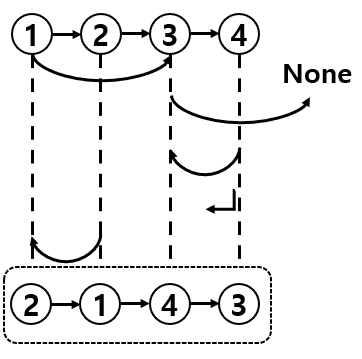

## Q18. 홀짝 연결 리스트
- 연결 리스트를 홀수 노드 다음에 짝수 노드가 오도록 재구성하라  
- 공간 복잡도 O(1), 시간 복잡도 O(n)에 풀이하라

- 입력
___
```
1 2 3 4 5 Null
```
___
- 출력
___
```
1 3 5 2 4 Null
```
___

### 풀이 01 // 반복 구조로 홀짝 노드 처리

In [ ]:
class Solution:
    def oddEvenList(self, head: ListNode) -> ListNode:
        # 예외 처리
        if head is None:
            return None

        odd = head # 홀수
        even = head.next # 짝수
        even_head = head.next # 짝수 헤드

        # 반복하면서 홀짝 노드 처리
        while even and even.next:
            odd.next, even.next = odd.next.next, even.next.next
            odd, even = odd.next, even.next

        # 홀수 노드의 마지막을 짝수 헤드로 연결
        odd.next = even_head # 홀수 에서 짝수로 연결
        return head

s = Solution()
l1 = ListNode(1)
l1.next = ListNode(2)
l1.next.next = ListNode(3)
l1.next.next.next = ListNode(4)
l1.next.next.next.next= ListNode(5)
answer = s.oddEvenList(l1)
while answer is not None:
  print(f'{answer.val}', end=" ")
  answer = answer.next

1 3 5 2 4 

```
  while even and even.next:
            odd.next, even.next = odd.next.next, even.next.next
            odd, even = odd.next, even.next
```
위의 코드를 도식화 하면 아래와 같다  
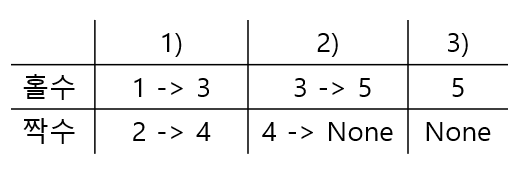

## Q19. 역순 연결 리스트 Ⅱ
- 인덱스 m 에서 n까지를 역순으로 만들어라
- 인덱스 m 은 1부터 시작한다

- 입력
___
```
1 2 3 4 5 Null, m = 2, n = 4
```
___
- 출력
___
```
1 4 3 2 5 Null
```
___

### 풀이 01 // 반복 구조로 노드 뒤집기

In [ ]:
class Solution:
    def reverseBetween(self, head: ListNode, m: int, n: int) -> ListNode:
        # 예외 처리
        if not head or m == n:
            return head

        root = start = ListNode(None)
        root.next = head
        # start, end 지정
        for _ in range(m - 1):
            start = start.next
        end = start.next

        # 반복하면서 노드 차례대로 뒤집기
        for _ in range(n - m): # 4 - 2 = 2 두번 반복
            tmp, start.next, end.next = start.next, end.next, end.next.next # tmp = start.next, start.next = end.next, end.next = end.next.next 각각 값 바꾸기
            start.next.next = tmp
        return root.next

s = Solution()
l1 = ListNode(1)
l1.next = ListNode(2)
l1.next.next = ListNode(3)
l1.next.next.next = ListNode(4)
l1.next.next.next.next= ListNode(5)
answer = s.reverseBetween(l1,2,4)
while answer is not None:
  print(f'{answer.val}', end=" ")
  answer = answer.next

1 4 3 2 5 

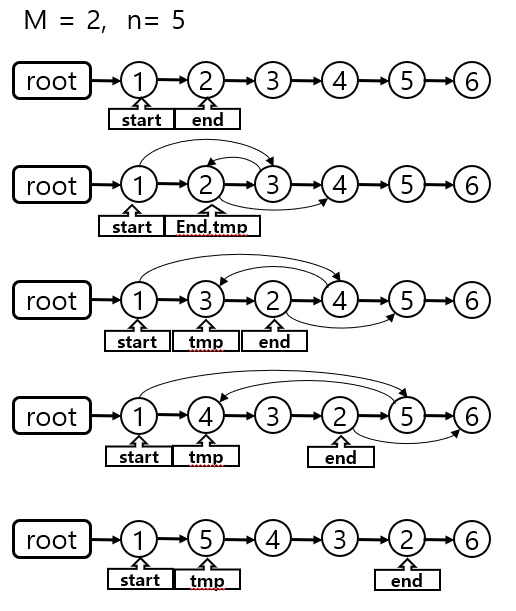